# 9.9 전이학습
* 전이학습에서 사전훈련(pre-training)으로 더 자주 쓰임

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3), 
                                include_top=False, weights='imagenet') # top은 header 부분을 의미

87910968/87910968 [==============================] - 4s 0us/step


In [3]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 37, 37, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalizati

# 레이어 동결

In [4]:
# 학습을 하지 않도록 설정
for layer in pre_trained_model.layers:
    layer.trainable = False 

In [5]:
pre_trained_model.layers[1].trainable

False

# 새로운 헤더 작업

In [6]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = Flatten()(last_output)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x) # mnist 데이터셋의 클래스가 10개이므로

# lr : learning rate , 동결이 풀려있는 상태에서 학습률을 더 낮게 설정
model = Model(pre_trained_model.input, outputs)
model.compile(optimizer=RMSprop(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 37, 37, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalization[0][0

In [7]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [9]:
import cv2

x_train_75 = []
for image in x_train[:10000]:
    x_train_75.append(cv2.resize(image, (75, 75)))
x_train_75 = np.array(x_train_75)

x_test_75 = []
for image in x_test[:2000]:
    x_test_75.append(cv2.resize(image, (75, 75)))
x_test_75 = np.array(x_train_75)

x_train_75 = np.stack((x_train_75,x_train_75,x_train_75), axis=-1)
x_test_75 = np.stack((x_test_75,x_test_75,x_test_75), axis=-1)

x_train_sc = x_train_75 / 255
x_test_sc = x_test_75 / 255

x_train_sc = x_train_sc.astype('float32')
x_test_sc = x_test_sc.astype('float32')

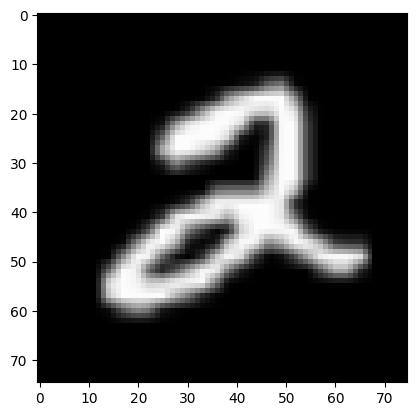

In [10]:
plt.imshow(x_train_sc[5])
plt.show()

In [11]:
y_train_sc = y_train[:10000].copy()
y_test_sc = y_test[:2000].copy()
history = model.fit(x_train_sc, y_train_sc, epochs=20, validation_split=0.2)

Epoch 1/20
250/250 [==============================] - 20s 71ms/step - loss: 0.3392 - accuracy: 0.9011 - val_loss: 0.1349 - val_accuracy: 0.9560
Epoch 2/20
250/250 [==============================] - 17s 69ms/step - loss: 0.0944 - accuracy: 0.9701 - val_loss: 0.0801 - val_accuracy: 0.9710
Epoch 3/20
250/250 [==============================] - 17s 69ms/step - loss: 0.0615 - accuracy: 0.9789 - val_loss: 0.2002 - val_accuracy: 0.9300
Epoch 4/20
250/250 [==============================] - 18s 72ms/step - loss: 0.0474 - accuracy: 0.9840 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 5/20
250/250 [==============================] - 18s 71ms/step - loss: 0.0325 - accuracy: 0.9885 - val_loss: 0.0716 - val_accuracy: 0.9805
Epoch 6/20
250/250 [==============================] - 18s 70ms/step - loss: 0.0250 - accuracy: 0.9916 - val_loss: 0.0716 - val_accuracy: 0.9745
Epoch 7/20
250/250 [==============================] - 17s 69ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.1334 - val_accuracy:

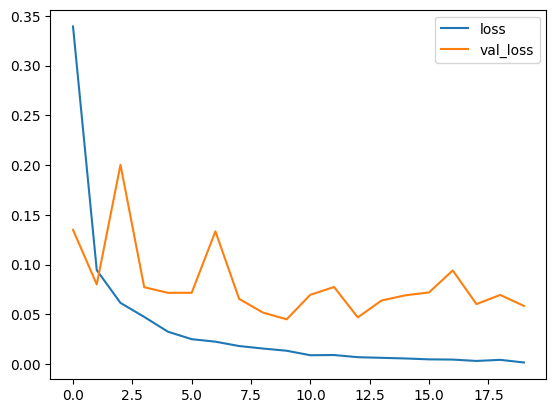

In [12]:
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

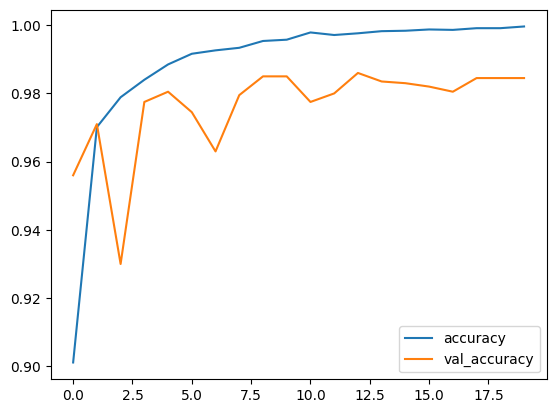

In [13]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()